In [186]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'datasets/startup_funding_cn.csv'

In [187]:
df = pd.read_csv(file, encoding = 'utf-8', skipinitialspace=True)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


##### Problem 1 - Choose suitable city for startup

In [188]:
data = df.copy()

In [189]:
data.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [190]:
#dropping the null values in accordance to CityLocation
data.dropna(subset=['CityLocation'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [191]:
#separating the multiple location startups
def separateCity(city):
    return city.split('/')[0].strip()

data.CityLocation = data.CityLocation.apply(separateCity)

In [192]:
#correcting the names of cities and clubbing delhi, noida and gurgaon as delhi ncr.
data.CityLocation.replace('bangalore', 'Bangalore', inplace=True)
data.CityLocation.replace('Delhi', 'New Delhi', inplace=True)
data.CityLocation.replace('New Delhi', 'NCR', inplace=True)
data.CityLocation.replace('Noida', 'NCR', inplace=True)
data.CityLocation.replace('Gurgaon', 'NCR', inplace=True)

In [193]:
#using value_counts() to check the city with most fundings
result = data.CityLocation.value_counts()[:5]
city = result.index
count = result.values

In [194]:
#printing the output
print(city[0], count[0])

NCR 709


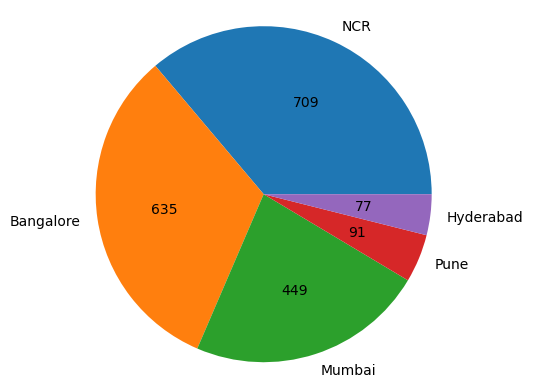

In [195]:
#plotting a pie graph
def absolute_value(x):
    x = np.round(x/100*count.sum())
    return int(x)

plt.pie(count, labels=city, autopct=absolute_value)
plt.axis('equal')
plt.show()

<hr>

##### Problem 2 - Top 5 investors who have invested maximum number of times (consider repeat investments in one company also)

In [196]:
data = df.copy()

In [197]:
#dropping the null values in accordance to InvestorsName
data.dropna(subset=['InvestorsName'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [198]:
#separating the multiple investors in one startup and storing in a list
investors = []

def separateInvestors(x):
    investors.append(x.split(','))

data.InvestorsName.apply(separateInvestors)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
data.InvestorsName.head()

0                                          Kae Capital
1                           Triton Investment Advisors
2    Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3    Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                       Narottam Thudi, Shireesh Palle
Name: InvestorsName, dtype: object

In [199]:
#counting the freq and storing it in a dict
di = {}
for i in investors:
    for j in i:
        j = j.strip()
        di[j] = di.get(j, 0) + 1

In [200]:
#sorting the dict and printing the result
di_keys = sorted(di, key=di.get, reverse=True)
inNames = []
freq = []
for i in range(5):
    inNames.append(di_keys[i])
    freq.append(di[di_keys[i]])
    print(di_keys[i], di[di_keys[i]])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


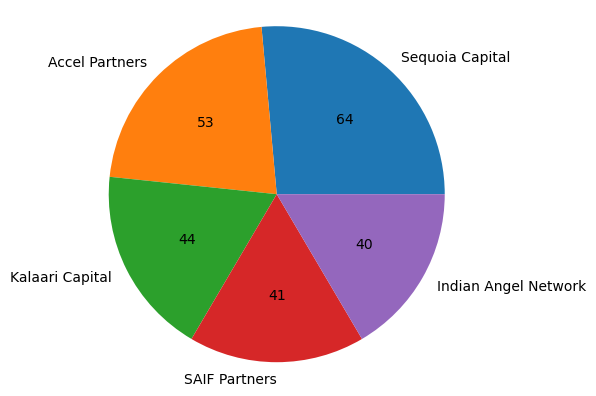

In [201]:
#plotting a pie graph
def absolute_value(x):
    x = np.round(x/100*sum(freq))
    return int(x)

plt.pie(freq, labels=inNames, autopct=absolute_value)
plt.axis('equal')
plt.show()

<hr>

##### Problem 3 - Top 5 investors who have invested maximum number of times in different companies

In [202]:
data = df.copy()

In [203]:
#dropping the null values in accordance to InvestorsName, StartupName
data.dropna(subset=['InvestorsName', 'StartupName'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [204]:
#checking duplicate names
for i in range(data.StartupName.shape[0]):
    if ('oyo' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('rooms' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Rooms' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Oyo' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Paytm' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Ola' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('ola' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('flipkart' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Flipkart' in data.StartupName[i]):
        print(data.StartupName[i])

Vista Rooms
Ola
Flipkart
Ola
Paytm
Ola Cabs
HolaChef
Oyo Rooms
Ola
Paytm Marketplace
Flipkart
Oriano Solar
Flipkart
FroyoFit
OyoRooms
Paytm
HolaChef
Truckola
SolarTown
Oyo
RoomsTonite
Kolabro
Deyor Rooms
Ola
HolaChef
Ola Cabs
Ola Cabs
Paytm
Oyorooms
Zo Rooms
EzySolare
Ola Cabs
Oyo Rooms
Zo Rooms
Flipkart.com
Flipkart
Applied Solar Technologies
Holachef
Olacabs
Paytm
OYO Rooms
HolaChef
Paytm


In [205]:
#updating duplicate names and spellings
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']

In [206]:
#separating the multiple investors in one startup and storing in a list
def separateInvestors(x):
    return x.split(',')

data.InvestorsName = data.InvestorsName.apply(separateInvestors)

In [207]:
#making two lists where every index will correspond to investorName and startupName
investor_name = []
startup_name = []

for index,row in data.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    for j in s:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

In [219]:
#updating the df data with the lists made above
data = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
data.head()

,InvestorsName,StartupName
0,Kae Capital,TouchKin
1,Triton Investment Advisors,Ethinos
2,Kashyap Deorah,Leverage Edu
3,Anand Sankeshwar,Leverage Edu
4,Deepak Jain,Leverage Edu


In [220]:
#grouping the data using nunique() which returns df with counts of unique elements in each position.
#sorting the df in descending order and printing the result.
data = data.groupby('InvestorsName')['StartupName'].nunique()
# print(data.head(10))
data = data.sort_values(ascending = False)[:5]

name = []
count = []
for i in range(data.shape[0]):
    print(data.index[i],data.values[i])
    name.append(data.index[i])
    count.append(data.values[i])

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


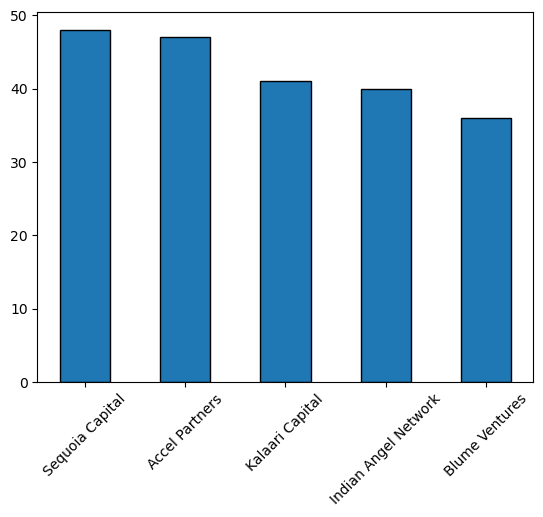

In [221]:
#plotting a bar graph for the same
plt.bar(name, count, width = 0.5, edgecolor='black')
plt.xticks(rotation=45)
plt.show()

<hr>

##### Problem 4 - Top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.

In [245]:
data = df.copy()

In [246]:
#dropping the null values in accordance to InvestorsName, StartupName, and InvestmentType
data.dropna(subset=['InvestorsName', 'StartupName', 'InvestmentType'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [247]:
#updating duplicate names and spellings
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
data.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
data.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
data.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)

In [254]:
#updating the df with only Crowd Funding and Seed Funding investments
data = data[(data.InvestmentType == 'Crowd Funding')|(data.InvestmentType == 'Seed Funding')]

In [255]:
#separating the multiple investors in one startup and storing in a list
def separateInvestors(x):
    return x.split(',')

data.InvestorsName = data.InvestorsName.apply(separateInvestors)

In [256]:
#making two lists where every index will correspond to investorName and startupName
investor_name = []
startup_name = []

for index,row in data.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    for j in s:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

In [257]:
#updating the df data with the lists made above
data = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
data.head()

,InvestorsName,StartupName
0,Kashyap Deorah,Leverage Edu
1,Anand Sankeshwar,Leverage Edu
2,Deepak Jain,Leverage Edu
3,Sadashiva NT,Leverage Edu
4,Arjun Mehta,Leverage Edu


In [258]:
#grouping the data using nunique() which returns df with counts of unique elements in each position.
#sorting the df in descending order and printing the result.
data = data.groupby('InvestorsName')['StartupName'].nunique()
# print(data.head(10))
data = data.sort_values(ascending = False)[:5]

name = []
count = []
for i in range(data.shape[0]):
    print(data.index[i],data.values[i])
    name.append(data.index[i])
    count.append(data.values[i])

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


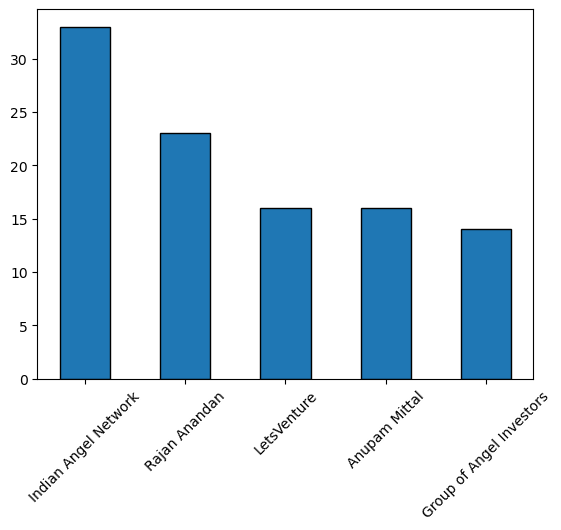

In [259]:
#plotting a bar graph for the same
plt.bar(name, count, width = 0.5, edgecolor='black')
plt.xticks(rotation=45)
plt.show()

<hr>

##### Problem 5 - Top 5 investors who have invested in a different number of startups and their investment type is Private Equity.

In [260]:
data = df.copy()

In [261]:
#dropping the null values in accordance to InvestorsName, StartupName, and InvestmentType
data.dropna(subset=['InvestorsName', 'StartupName', 'InvestmentType'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [262]:
#updating duplicate names and spellings
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
data.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
data.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
data.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)

In [263]:
#updating the df with only Private Equity investments
data = data[(data.InvestmentType == 'Private Equity')]

In [264]:
#separating the multiple investors in one startup and storing in a list
def separateInvestors(x):
    return x.split(',')

data.InvestorsName = data.InvestorsName.apply(separateInvestors)

In [265]:
#making two lists where every index will correspond to investorName and startupName
investor_name = []
startup_name = []

for index,row in data.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    for j in s:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

In [266]:
#updating the df data with the lists made above
data = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
data.head()

,InvestorsName,StartupName
0,Kae Capital,TouchKin
1,Triton Investment Advisors,Ethinos
2,Infuse Ventures,Ecolibriumenergy
3,JLL,Ecolibriumenergy
4,Asset Management (Asia) Ltd,Droom


In [267]:
#grouping the data using nunique() which returns df with counts of unique elements in each position.
#sorting the df in descending order and printing the result.
data = data.groupby('InvestorsName')['StartupName'].nunique()
# print(data.head(10))
data = data.sort_values(ascending = False)[:5]

name = []
count = []
for i in range(data.shape[0]):
    print(data.index[i],data.values[i])
    name.append(data.index[i])
    count.append(data.values[i])

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


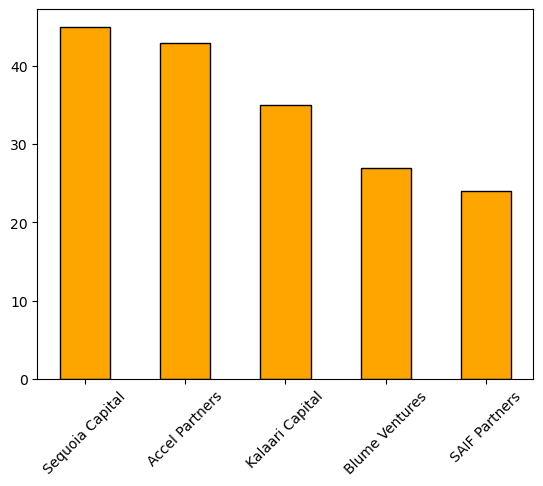

In [274]:
#plotting a bar graph for the same
plt.bar(name, count, width = 0.5, edgecolor='black', color = 'orange')
plt.xticks(rotation=45)
plt.show()

<hr>

    
                                                                                case study analysis by Vishal Kumar Singh